<h1>Descripcion</h1>

Data Exploration: Es sobre descubrir que es lo que nuestros datos significan estadisticamente y aplicar tecnicas de visualizacion, este paso ser realiza para obtener aspectos importantes del conjunto.

Univariado: Se enfoca en el analisis de los atributos uno a uno.

Bivariado: Analisa dos atributos en conjunto


In [14]:
#Importacion de librerias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Cargar los datos

data= pd.read_csv("golf-dataset.csv")

In [16]:
data

,Outlook,Temp,Humidity,Windy,Play Golf
0,Overcast,Cool,Normal,True,Yes
1,Overcast,Hot,High,False,Yes
2,Overcast,Hot,Normal,False,Yes
3,Overcast,Mild,High,True,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Rainy,Mild,High,False,Yes
7,Rainy,Mild,High,True,No
8,Rainy,Mild,Normal,False,Yes
9,Sunny,Cool,Normal,False,Yes


In [17]:
#Exploracion de variables para determinar que son, numericas o categoricas 
data.dtypes

Outlook      object
Temp         object
Humidity     object
Windy          bool
Play Golf    object
dtype: object

In [18]:
#Exploracion de variables para determinar si nos enfretamos con registros nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Outlook      14 non-null object
Temp         14 non-null object
Humidity     14 non-null object
Windy        14 non-null bool
Play Golf    14 non-null object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [19]:
#**Exploracion de variables para determinar si nos enfretamos Problemas atipicos y grandes desviaciones**
data.describe(include="all")

,Outlook,Temp,Humidity,Windy,Play Golf
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,Normal,False,Yes
freq,5,6,7,8,9


<h2>Analisis Univariado</h2>

Parte del analisis univariado incluye realizar tablas de frecuencia para observar que tan recurrentes son las categorias.

Como son atributos categoricos lo unico que podemos hacer es generar graficos pie o bar y tablas de frecuencia.

Para realizar la tabla, creo un nuevo dataframe llamado outlook, mediante el metodo group by que agrupa los datos creando un nuevo indice en este caso sera el atributo outlook, mediante agg creamos una nueva columna que almacena el conteo de los atributos.

In [20]:
outlook=data.groupby("Outlook").agg(Frecuencia=("Outlook","count"))
outlook["Frecuencia Acumulada"]= outlook["Frecuencia"].cumsum()
outlook["Frecuencia Relativa"]=outlook["Frecuencia"]/14
outlook

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa
Outlook,,,
Overcast,4,4,0.285714
Rainy,5,9,0.357143
Sunny,5,14,0.357143


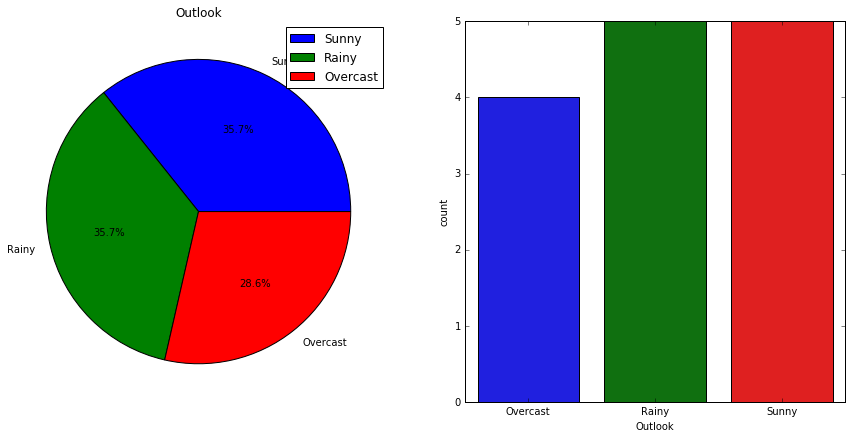

In [21]:
plt.subplots(figsize=(15,15))
plt.subplot(2,2,1)
ax=data["Outlook"].value_counts().plot.pie(legend=True,autopct="%1.1f%%")
ax.set(title="Outlook",ylabel="")
plt.subplot(2,2,2)
sns.countplot(x=data["Outlook"])



In [22]:
temp = data.groupby("Temp").agg(Frecuencia=("Temp","count"))
temp["Frecuencia Absoluta"]= temp["Frecuencia"].cumsum()
temp["Frecuencia Relativa % "]=round((temp["Frecuencia"]/14)*100,2)
temp

,Frecuencia,Frecuencia Absoluta,Frecuencia Relativa %
Temp,,,
Cool,4,4,28.57
Hot,4,8,28.57
Mild,6,14,42.86


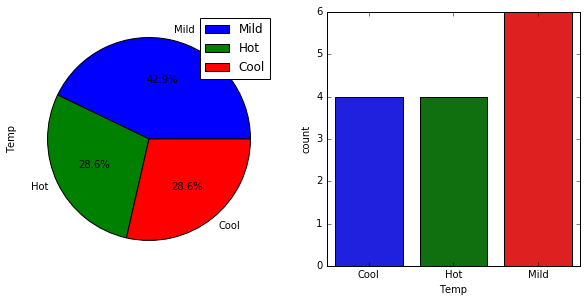

In [23]:
plt.subplots(figsize=(10,10))
plt.subplot(2,2,1) #Fila,columna, indice
data["Temp"].value_counts().plot.pie(legend=True,autopct="%1.1f%%")
plt.subplot(2,2,2)
sns.countplot(data["Temp"])

In [24]:
humidity = data.groupby("Humidity").agg(Frecuencia=("Humidity","count"))
humidity["Frecuencia Absotula"]=humidity["Frecuencia"].cumsum()
humidity["Frecuencia Relativa"]=round((humidity["Frecuencia"]/14)*100,2)
humidity

,Frecuencia,Frecuencia Absotula,Frecuencia Relativa
Humidity,,,
High,7,7,50.0
Normal,7,14,50.0


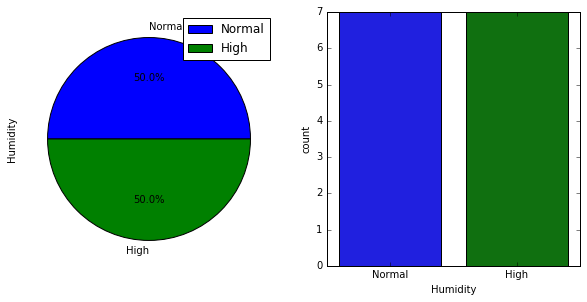

In [25]:
plt.subplots(figsize=(10,10))
plt.subplot(2,2,1) #Fila,columna, indice
data["Humidity"].value_counts().plot.pie(legend=True,autopct="%1.1f%%")
plt.subplot(2,2,2)
sns.countplot(data["Humidity"])

In [26]:
windy=data.groupby("Windy").agg(Frecuencia=("Windy","count"))
windy["Frecuencia Absoluta"]= windy["Frecuencia"].cumsum()
windy["Frecuencia Relativa"]=round((windy["Frecuencia"]/14)*100,2)
windy

,Frecuencia,Frecuencia Absoluta,Frecuencia Relativa
Windy,,,
False,8,8,57.14
True,6,14,42.86


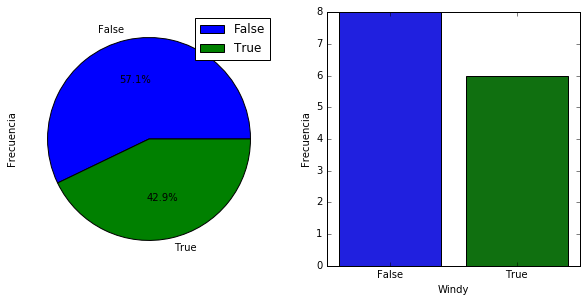

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
windy["Frecuencia"].plot.pie(legend=True,autopct="%1.1f%%")
plt.subplot(2,2,2)
sns.barplot(windy.index,windy["Frecuencia"])

<h2>Analisis Bivariado</h2>
Consiste en el analisis simultaneo de dos variables, explora el concepto de relacion entre las variables **(predictor vs target)**, Existen tres tipos de analisis Bivariado

1. Numerico & Numerico
2. Categorico & Categorico
3. Numerico & Categorico

En el caso de mi dataset es **categorico vs categorico**, lo que esta compuesto por graficos de barras y el test de chi cuadrado.

Para este tipo de analisis chi cuadrado se generan dos hipotesis:
<ul>
<li>hipotesis nula  : jugar o no jugar *No* depende del outlook/ wind / humidity/ temp</li>
<li>hipotesis alternativa  : jugar o no jugar depende del outlook/ wind / humidity/ temp</li>
</ul>




In [28]:
pd.crosstab(data["Outlook"],data["Play Golf"],margins=True)

Play Golf,No,Yes,All
Outlook,,,
Overcast,0,4,4
Rainy,2,3,5
Sunny,3,2,5
All,5,9,14


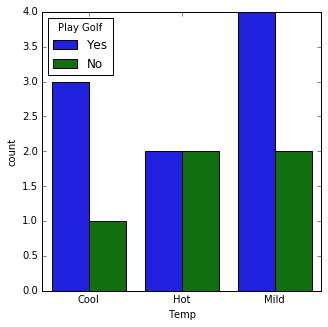

In [29]:
plt.figure(figsize=(5,5))
g = sns.countplot(x="Temp",data=data,hue="Play Golf")


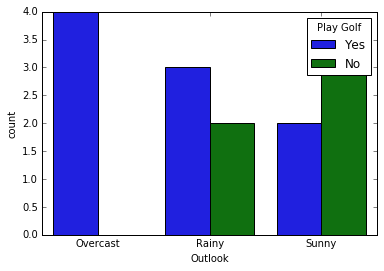

In [30]:
g = sns.countplot(x="Outlook",data=data,hue="Play Golf")

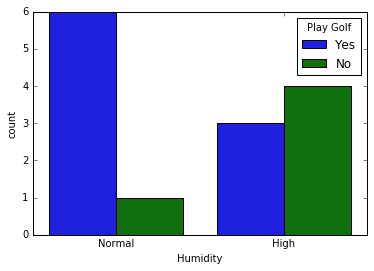

In [31]:
g = sns.countplot(x="Humidity",data=data,hue="Play Golf")

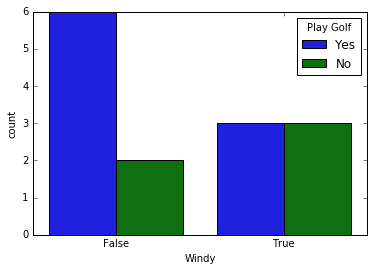

In [32]:
g = sns.countplot(x="Windy",data=data,hue="Play Golf")

<h2>Test de chi2 para determinar la asociacion entre los atributos(Categoria)</h2>

Manualmente chicuadrado se calcula con tres pasos:

1. Definir las hipotesis --> listo
2. Construir Tabla de Contingencia
3. Calcular valor de chi cuadrado

**Tabla de Contingencia**

La tabla de contingencia se construye con la siguiente formula

E = n * P

n: Cantidad de elementos en el subconjunto

P: Probabilidad

la tabla de contingencia se construye en base a la **tabla de observados** de la siguiente manera:

In [33]:
observado = pd.crosstab(data["Outlook"],data["Play Golf"],margins=True)
print(observado)

#e1 = 14*((observado["All"]["Overcast"]/14 )*(observado["Yes"]["All"]/14))




Play Golf  No  Yes  All
Outlook                
Overcast    0    4    4
Rainy       2    3    5
Sunny       3    2    5
All         5    9   14
2.5714285714285716


**La tabla de contigencia se construye de la siguiente manera:**

<table>
<thead>
	<tr>
		<th style="background-color:#73dec1">Play Golf</th>
		<th style="background-color:#73dec1">No</th>
		<th style="background-color:#73dec1">Yes</th>
	</tr>
</thead>
<tbody>
	<tr>
		<td style="background-color:#73dec1">Overcast</td>
		<td>E1 = 14 x p(overcast|no) = 14 * p(overcast)* p(no) = 14 * (4/14)* (5/14) = 1.42</td>
		<td>E2 = 14 x p(overcast|yes) = 14 * p(overcast)* p(yes) = 14 * (4/14)* (9/14) = 2.57</td>
	</tr>
	<tr>
		<td style="background-color:#73dec1">Rainy</td>
		<td>E3 = 14 x p(rainy|no) = 14 * p(rainy)* p(no) = 14 * (5/14)* (5/14) = 1.78</td>
		<td>E4 = 14 x p(rainy|yes) = 14 * p(rainy)* p(yes) = 14 * (5/14)* (9/14) = 3.12</td>
	</tr>
	<tr>
		<td style="background-color:#73dec1">Sunny</td>
		<td>E5 = 14 x p(sunny|no) = 14 * p(sunny)* p(no) = 14 * (5/14)* (5/14) = 1.78</td>
		<td>E6 = 14 x p(sunny|yes) = 14 * p(sunny)* p(no) = 14 * (5/14)* (9/14) = 3.12</td>
	</tr>
</tbody>
</table>

<h3>Calcular Chi cuadrado</h3>

$\sum{(E-O)**2/E}$


Tabla de ayuda

<table>
<thead>
	<tr>
		<th style="background-color:#73dec1">----</th>
		<th style="background-color:#73dec1">O</th>
		<th style="background-color:#73dec1">E</th>
		<th style="background-color:#73dec1">E-O</th>
		<th style="background-color:#73dec1">(E-O)**2</th>
		<th style="background-color:#73dec1">(E-O)**2/E</th>
	</tr>
</thead>
<tbody>
<tr>
<td>Overcast,yes</td>
</tr>
<tr>
<td>Overcast,no</td>
</tr>
<tr>
<td>Sunny,yes</td>
</tr>
<tr>
<td>Sunny,no</td>
</tr>
<tr>
<td>Rainy,yes</td>
</tr>
<tr>
<td>Rainy,no</td>
</tr>
</tbody>


In [34]:
pd.crosstab(data["Outlook"],data["Play Golf"])

Play Golf,No,Yes
Outlook,,
Overcast,0,4
Rainy,2,3
Sunny,3,2


In [35]:
from scipy.stats import chi2_contingency

observado = pd.crosstab(data["Outlook"],data["Play Golf"])
chi,pvalue,df,expected= chi2_contingency(observado)
print("valor de chi cuadrado :",chi)
print("valor p o punto de corte:",pvalue)
print("grados de libertad:",df)
print("Tabla de contingencia---------------")
print(expected)

valor de chi cuadrado : 3.5466666666666664
valor p o punto de corte: 0.16976615743981122
grados de libertad: 2
Tabla de contingencia---------------
[[1.42857143 2.57142857]
 [1.78571429 3.21428571]
 [1.78571429 3.21428571]]


In [36]:
observado = pd.crosstab(data["Temp"],data["Play Golf"])
chi,pvalue,df,expected= chi2_contingency(observado)
print("valor de chi cuadrado :",chi)
print("valor p o punto de corte:",pvalue)
print("grados de libertad:",df)
print("Tabla de contingencia---------------")
print(expected)


valor de chi cuadrado : 0.5703703703703703
valor p o punto de corte: 0.7518750053142591
grados de libertad: 2
Tabla de contingencia---------------
[[1.42857143 2.57142857]
 [1.42857143 2.57142857]
 [2.14285714 3.85714286]]


In [37]:
observado = pd.crosstab(data["Humidity"],data["Play Golf"])
chi,pvalue,df,expected= chi2_contingency(observado)
print("valor de chi cuadrado :",chi)
print("valor p o punto de corte:",pvalue)

valor de chi cuadrado : 1.2444444444444445
valor p o punto de corte: 0.2646162170835855


In [38]:
observado = pd.crosstab(data["Windy"],data["Play Golf"])
chi,pvalue,df,expected= chi2_contingency(observado)
print("valor de chi cuadrado :",chi)
print("valor p o punto de corte:",pvalue)

valor de chi cuadrado : 0.16203703703703703
valor p o punto de corte: 0.687287949348002


In [39]:
pd.crosstab(data["Temp"],data["Play Golf"])

Play Golf,No,Yes
Temp,,
Cool,1,3
Hot,2,2
Mild,2,4


In [40]:
pd.crosstab(data["Humidity"],data["Play Golf"])


Play Golf,No,Yes
Humidity,,
High,4,3
Normal,1,6


In [41]:
pd.crosstab(data["Windy"],data["Play Golf"])


Play Golf,No,Yes
Windy,,
False,2,6
True,3,3


In [42]:
data.groupby(["Outlook","Play Golf"])["Temp"].count()

Outlook   Play Golf
Overcast  Yes          4
Rainy     No           2
          Yes          3
Sunny     No           3
          Yes          2
Name: Temp, dtype: int64

In [43]:
data[data["Outlook"]=="Sunny"].pivot_table(index="Temp",values="Outlook",columns="Play Golf",aggfunc="count")

Play Golf,No,Yes
Temp,,
Cool,NaN,1.0
Hot,2.0,NaN
Mild,1.0,1.0


In [44]:
data[data["Outlook"]=="Sunny"].pivot_table(index="Windy",values="Outlook",columns="Play Golf",aggfunc="count")


Play Golf,No,Yes
Windy,,
False,2,1
True,1,1


In [45]:
filtro=data[data["Outlook"]=="Sunny"]
pd.crosstab(filtro["Windy"],filtro["Play Golf"])

Play Golf,No,Yes
Windy,,
False,2,1
True,1,1


In [46]:
filtro=data[data["Outlook"]=="Sunny"]
pd.crosstab(filtro["Humidity"],filtro["Play Golf"])

Play Golf,No,Yes
Humidity,,
High,3,0
Normal,0,2


In [47]:
import math 

yes = len(data[data["Play Golf"]=="Yes"])/len(data["Play Golf"])

no= len(data[data["Play Golf"]=="No"])/len(data["Play Golf"])



In [48]:
golf = data.groupby("Play Golf").agg(Total=("Play Golf","count"))


In [49]:
outlook = pd.crosstab(data["Windy"],data["Play Golf"])
aux=[]
for i in outlook.values:
    aux.append(i[0] + i[1])
    
    

In [50]:
outlook["Frecuencia"] = aux
outlook

Play Golf,No,Yes,Frecuencia
Windy,,,
False,2,6,8
True,3,3,6


In [51]:
data[data["Outlook"]=="Sunny"].groupby("Play Golf").agg(Frecuencia=("Play Golf","count"))

,Frecuencia
Play Golf,
No,3
Yes,2


In [52]:
outlook = pd.crosstab(data[data["Outlook"]=="Sunny"]["Humidity"],data[data["Outlook"]=="Sunny"]["Play Golf"])
aux=[]
for i in outlook.values:
    aux.append(i[0] + i[1])
outlook["Frecuencia"] = aux
outlook

Play Golf,No,Yes,Frecuencia
Humidity,,,
High,3,0,3
Normal,0,2,2


In [53]:
data[data["Outlook"]=="Rainy"].groupby("Play Golf").agg(Frecuencia=("Play Golf","count"))

,Frecuencia
Play Golf,
No,2
Yes,3


In [54]:
outlook = pd.crosstab(data[data["Outlook"]=="Rainy"]["Windy"],data[data["Outlook"]=="Rainy"]["Play Golf"])
aux=[]
for i in outlook.values:
    aux.append(i[0] + i[1])
outlook["Frecuencia"] = aux
outlook

Play Golf,No,Yes,Frecuencia
Windy,,,
False,0,3,3
True,2,0,2
